## Pattern Recognition - Assignment 1

### Importing libraries 

In [2]:
import numpy as np
import random
from numpy import sign
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import *
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import accuracy_score

### Batch Training Algorithm

In [16]:
def batchTrainingAlgo(x,y,weights, LR = 1):
    counter=0
    n = int(x.shape[1]) # number of features + bias
    datalength=len(x) # number of data points
    delta=np.ones(n) # delta array initialized with ones to be able to enter the while loop
    delta_plot = []  # Array to fill in the updated deltas, to be able to plot them later
    wArray=[]        # Array to fill in all weights 
    epochs = 0      # Initialize epochs variable before entering loop 
    eps = sys.float_info.epsilon
    while (np.linalg.norm(delta,1)>eps): # Checking that the norm of delta is greater than epsilon 
        delta= np.zeros(n) # redefining delta to be an array of zeros of size n 
        epochs +=1
        for i in range(datalength): # for each point
            xDotw=weights.dot(x[i])  
            prediction=y[i]*xDotw    # Checking label sign matches X.W
            if prediction <=0:
                delta=delta-(x[i]*y[i])   # Updating delta
        delta = delta/datalength  
        weights = weights - (LR * delta)
        counter+=1     # Increment this counter that represents steps needed to update model weights
        wArray.append(weights) # All weights 
        delta_plot.append(np.linalg.norm(delta,1))  # Appending updated delta to an array to be plotted later
    return counter,weights, epochs,delta_plot

### Online Training Algorithm

In [8]:
def onlineTraningAlgo(x,y,weights, LR = 1):
    counter=0
    n = int(x.shape[1]) # number of features + bias
    datalength=len(x) # number of data points
    delta=np.ones(n) # delta array initialized with ones to be able to enter the while loop
    delta_plot =[]   # Array to fill in the updated deltas, to be able to plot them later
    wArray=[]        # Array to fill in all weights 
    epochs = 0      # Initialize epochs variable before entering loop 
    eps = sys.float_info.epsilon
    while (np.linalg.norm(delta,1)>eps): # Checking that the norm of delta is greater than epsilon 
        delta= np.zeros(n) # redefining delta to be an array of zeros of size n 
        epochs +=1
        for i in range(datalength): # for each point
            xDotw=weights.dot(x[i])  
            prediction=y[i]*xDotw    # Checking label sign matches X.W
            if prediction <=0: 
                counter+=1          # Increment this counter that represents steps needed to update model weights
                delta=delta-(x[i]*y[i]) # Updating delta
                delta = delta/datalength
                weights = weights - (LR * delta)
                wArray.append(weights) # All weights 
        delta_plot.append(np.linalg.norm(delta,1))  # Appending updated delta to an array to be plotted later
    return counter,weights, epochs,delta_plot

In [4]:
# Question 1 Data
xInput = np.array([[50,55,70,80,130,150,155,160],[1,1,1,1,1,1,1,1]]).T
yInput=np.array([1,1,1,1,-1,-1,-1,-1])
weights=np.array([random.uniform(-1,1)]*xInput.shape[1])  # Adding random weights

### Testing Question 1 *(Online Training)*

In [5]:
steps,W, epochs, d_plot=onlineTraningAlgo(xInput,yInput,weights)
print("Online Training")
print("Steps:",steps,"Weights:",W,"Epochs:",epochs)
print("Online Output")
test = np.array([[80,160],[1,1]]).T
for x in xInput:
    print(sign(W.dot(x)))

Online Training
Steps: 175 Weights: [-0.08357636  9.9293631 ] Epochs: 58
Online Output
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0


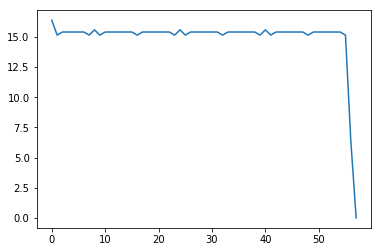

In [6]:
# Online Training delta plot
plt.plot(d_plot)

#### Removing points from data & let the model predict

In [7]:
# Question 1 Data but removed first and last point
xTest = np.array([[55,70,80,130,150,155],[1,1,1,1,1,1]]).T
yTest =np.array([1,1,1,-1,-1,-1])
weights_test=np.array([random.uniform(-1,1)]*xTest.shape[1])  # Adding random weights
steps,W, epochs, d_plot=onlineTraningAlgo(xTest,yTest,weights_test)
print("Online Testing")
test = np.array([[50,160],[1,1]]).T
for x in test:
    print(sign(W.dot(x)))
# Output should be 1 and -1

Online Testing
1.0
-1.0


### Testing Question 1 *(Batch Training)*

In [8]:
steps,W,epochs,d_plot = batchTrainingAlgo(xInput,yInput,weights)
print("Batch Training...")
print("Steps:",steps,"Weights:",W,"Epochs:",epochs)
print("Batch Output")
for x in xInput:
    print(sign(W.dot(x)))


Batch Training...
Steps: 2651 Weights: [ -6.16511933 529.95988067] Epochs: 2651
Batch Output
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0


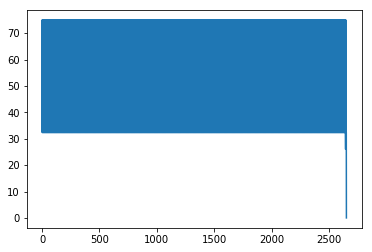

In [9]:
# Batch Training delta plot
plt.plot(d_plot)

#### Removing points from data & let the model predict

In [11]:
# Question 1 Data but removed first and last point
xTest = np.array([[55,70,80,130,150,155],[1,1,1,1,1,1]]).T
yTest =np.array([1,1,1,-1,-1,-1])
weights=np.array([random.uniform(-1,1)]*xTest.shape[1])  # Adding random weights
steps,W, epochs, d_plot=batchTrainingAlgo(xTest,yTest,weights)
print("Batch Testing")
test = np.array([[80,160],[1,1]]).T
for x in test:
    print(sign(W.dot(x)))
# Output should be 1 and -1

Batch Testing
1.0
-1.0


### Question 4 Data

In [54]:
xInput = np.array([[0,255,0,0,255,0,255,255],[0,0,255,0,255,255,0,255],[0,0,0,255,0,255,255,255],[1,1,1,1,1,1,1,1]]).T
yInput=np.array([1,1,1,-1,1,-1,-1,1])
weights=np.array([random.uniform(-1,1)]*xInput.shape[1])

### Testing Question 4 (Online Training)

In [57]:
steps,W, epochs,d_plot=onlineTraningAlgo(xInput,yInput,weights)

print("Online Training")
print("Steps:",steps,"Weights:",W,"Epochs:",epochs)
print("Online Output")
for x in xInput:
    print(sign(W.dot(x)))  # Similar to Y

Online Training
Steps: 9 Weights: [ 31.919965    31.41413614 -40.86491659   0.1222088 ] Epochs: 5
Online Output
1.0
1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0


[86.83789443969727, 0.125, 0.125, 0.125, 0.0]


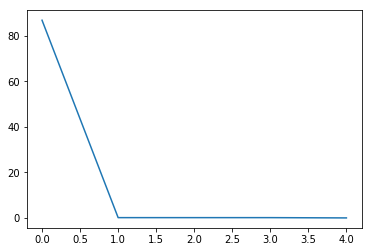

In [58]:
print(d_plot)
plt.plot(d_plot)

### Testing Question 4 (Batch Training)

In [59]:
steps,W,epochs,d_plot = batchTrainingAlgo(xInput,yInput,weights)
print("Batch Training")
print("Steps:",steps,"Weights:",W,"Epochs:",epochs)
print("Batch Output")
for x in xInput:
    print(sign(W.dot(x)))


Batch Training
Steps: 6 Weights: [ 63.22688028  63.22688028 -64.27311972   0.10188028] Epochs: 6
Batch Output
1.0
1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0


[223.75, 159.75, 0.125, 0.125, 0.125, 0.0]


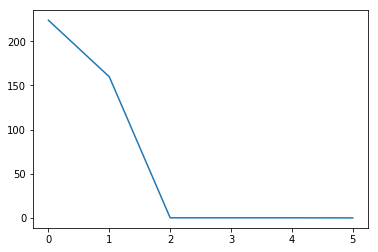

In [60]:
print(d_plot)
plt.plot(d_plot)

## Generated Data 

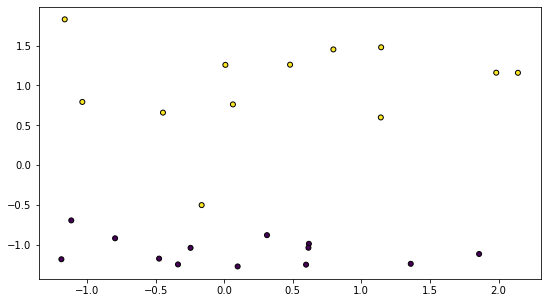

In [34]:
x,y=sklearn.datasets.make_classification(25, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
mask_for_y=y==0
y[mask_for_y]=-1
plt.figure(figsize=(9, 5))
plt.scatter(x[:,0],x[:,1],marker='o',c=y,s=25,edgecolor='k')

### Splitting the data into training and testing

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [36]:
# Generating random weights & running the online training model on data
weights=np.array([random.uniform(-1,1)]*x.shape[1])
steps,W, epochs,d_plot=onlineTraningAlgo(X_train,y_train,weights)

In [37]:
print("Steps:",steps,"Weights:",W,"Epochs:",epochs)

Steps: 15 Weights: [-0.08735753  0.33011538] Epochs: 3


In [38]:
prediction=[]
for val in X_test:
     prediction.append((sign(W.dot(val))))
print(prediction)
a=accuracy_score(y_test, prediction)
print(a*100)

[1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
85.71428571428571


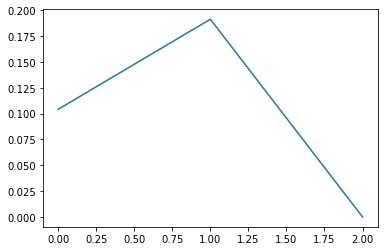

In [39]:
plt.plot(d_plot)

### basic equation is : W2*X2+W1*X1+Wo=0
* X1=(-W2*X2-Wo)/W1
*  X2=(-W1*X1-Wo)/W2
* At X1=0 -> X2=(-Wo/W2)  : 1st point (0,(-Wo/W2))
* At X2=0 -> X1=(-Wo/W1) : 2nd point ((-Wo/W1),0)
* **gradient =(y2-y2/x2-x1)**
* ([(-Wo/W2)-0] / [0-(-Wo/W1)]) ->
####  Wo/W2 - W1/Wo 
#### -W1/W2 

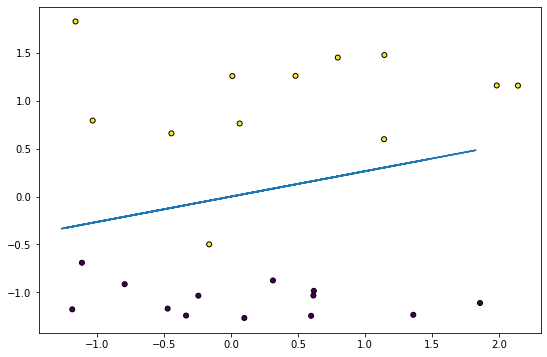

In [40]:
# y = W[0]*x[:,0] + W[1]*x[:,1] line equation, no bias
m = -(W[0]/W[1])  # slope = -w1/w2
plt.figure(figsize=(9, 6))
plt.plot(x[:,1] , m*x[:,1])
plt.scatter(x[:,0],x[:,1],marker='o',c=y,s=25,edgecolor='k')

In [41]:
# Testing the batch training model on data
steps,W, epochs,d_plot=batchTrainingAlgo(X_train,y_train,weights)

In [42]:
print("Steps:",steps,"Weights:",W,"Epochs:",epochs)

Steps: 3 Weights: [0.03058642 0.49709558] Epochs: 3


In [46]:
prediction=[]
for val in X_test:
     prediction.append((sign(W.dot(val))))
print(prediction)
a=accuracy_score(y_test, prediction)
print(a*100)

[1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
85.71428571428571


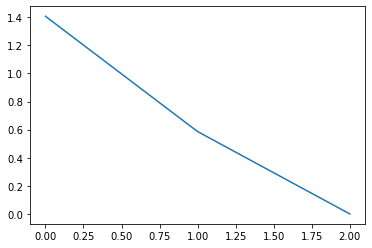

In [44]:
plt.plot(d_plot)

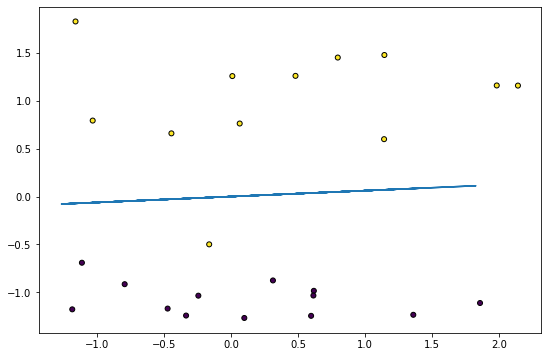

In [45]:
# y = W[0]*x[:,0] + W[1]*x[:,1] line equation, no bias
m = (W[0]/W[1])  # slope = w1/w2
plt.figure(figsize=(9, 6))
plt.plot(x[:,1] , m*x[:,1])
plt.scatter(x[:,0],x[:,1],marker='o',c=y,s=25,edgecolor='k')
